In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read Intermediate data from the folder
# Change the file name
df = pd.read_csv("intermediate_data/Data_1.CSV",skiprows=0)

In [3]:
df.columns

Index(['Processed Name', 'processed_parent', 'borrowerid', 'borrowername',
       'region', 'country', 'IQ_INDUSTRY_SECTOR', 'parent', 'parentticker',
       'ticker', 'companyisprivate', 'MATCH_NAME', 'MATCH_NAME1',
       'MATCH_NAME2', 'MATCH_NAME3', 'MATCH_NAME4', 'MATCH_NAME5', 'MATCH_ID',
       'MATCH_ID1', 'MATCH_ID2', 'MATCH_ID3', 'MATCH_ID4', 'MATCH_ID5',
       'COUNTRY1', 'COUNTRY2', 'COUNTRY3', 'COUNTRY4', 'COUNTRY5',
       'PAR_MATCH_NAME', 'PAR_MATCH_NAME1', 'PAR_MATCH_NAME2',
       'PAR_MATCH_NAME3', 'PAR_MATCH_NAME4', 'PAR_MATCH_NAME5', 'PAR_MATCH_ID',
       'PAR_MATCH_ID1', 'PAR_MATCH_ID2', 'PAR_MATCH_ID3', 'PAR_MATCH_ID4',
       'PAR_MATCH_ID5', 'SECTOR1', 'SECTOR2', 'SECTOR3', 'SECTOR4', 'SECTOR5'],
      dtype='object')

In [4]:
df.dropna(subset=['Processed Name'], inplace=True) 
#Drop the ones where company_name is missing (Actually it's for removing the NaNs when the csv file is improperly read)
df

,Processed Name,processed_parent,borrowerid,borrowername,region,country,IQ_INDUSTRY_SECTOR,parent,parentticker,ticker,...,PAR_MATCH_ID1,PAR_MATCH_ID2,PAR_MATCH_ID3,PAR_MATCH_ID4,PAR_MATCH_ID5,SECTOR1,SECTOR2,SECTOR3,SECTOR4,SECTOR5
0,Westin Memorial City,Westin Memorial City,109423,Westin Memorial City,USA/Canada,United States,Consumer Discretionary,Westin Memorial City,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wiener Stadtwerke Holding AG,Wiener Stadtwerke Holding AG,109620,Wiener Stadtwerke Holding AG,Western Europe,Austria,Utilities,Wiener Stadtwerke Holding AG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Utilities,NaN,NaN,NaN,NaN
2,Williams Holdings Ltd,Williams Holdings Ltd,109375,Williams Holdings Ltd,Asia Pacific,New Zealand,Industrials,Williams Holdings Ltd,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Financials,Industrials,Energy,0,Real Estate
3,Win Loyal Development Ltd,Win Loyal Development Ltd,109273,Win Loyal Development Ltd,Asia Pacific,Macao,Real Estate,Win Loyal Development Ltd,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wingspan Portfolio Holdings Inc,Wingspan Portfolio Holdings Inc,109407,Wingspan Portfolio Holdings Inc,USA/Canada,United States,Financials,Wingspan Portfolio Holdings Inc,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Financials,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,Zhejiang Sanmei Real Estate Development Co Ltd,Zhejiang Sanmei Real Estate Development Co Ltd,127680,Zhejiang Sanmei Real Estate Development Co Ltd,Asia Pacific,China,Real Estate,Zhejiang Sanmei Real Estate Development Co Ltd,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2421,Zhejiang Shengxin Enterprise Development Co Ltd,Zhejiang Shengxin Enterprise Development Co Ltd,128508,Zhejiang Shengxin Enterprise Development Co Ltd,Asia Pacific,India,Materials,Zhejiang Shengxin Enterprise Development Co Ltd,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2422,Zhejiang Topsun Logistic Control Co Ltd,Zhejiang Topsun Logistic Control Co Ltd,128247,Zhejiang Topsun Logistic Control Co Ltd,Asia Pacific,China,Materials,Zhejiang Topsun Logistic Control Co Ltd,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Industrials,NaN,NaN,NaN,NaN
2423,Zhejiang Valogin Technology Co Ltd,Zhejiang Valogin Technology Co Ltd,128255,Zhejiang Valogin Technology Co Ltd,Asia Pacific,China,Industrials,Zhejiang Valogin Technology Co Ltd,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Industrials,NaN,NaN,NaN,NaN


## State: 
## -1 No match from Capital IQ 
### -- Capital IQ search returns no result
## 0 No Match
### -- Name_matcher program returns no result 
## 1 Exact Match (Insensitive to Capital Letters)
### -- The Names, after removing blanks, non-ascii chars, ", . etc.", are EXACTLY the same && Their countries are the same
### -- Parent Names are EXACTLY the same (For those initially == -1 or 0 or 4) 
## 2 Multiple Exact Match
### -- Same critetia as 1(NAME+COUNTRY), but there are mutiple EXACT matches, we return the 1st result as default
### -- Parent Names are EXACTLY the same and mutiple EXACT (For those initially == -1 or 0)
## 3 Very Close Match 
### -- Possible outcome 1: Discounted Levenshetein score OR SSK > 0.95 & Country is the same
### -- Possible outcome 2: Discounted Levenshetein OR SSK (String Subsequence Kernel Similarity) > 0.75 & Country & Industry is the same
### -- Possible outcome 3: Parent outcome for ANY string_score>0.75 (By experience, as Parents are more famous, Capital IQ tends to return better results) (State -1,0,4) will undergo this parent check

## 4 Close Match (Unsure). 
### -- ONE OF String_match > 0.75 but country or Industry is not the same (Double Checks needed)

## 5 Special Match (Special BUT quite sure)
### -- Possible outcome 1////: string_match(one of them) < 0.75(Lower) BUT Country1==Country and Sector1 == Sector (The first result satisfying this requirement is usually a renamed company or acquisition etc. as Capital IQ tends to do that, by experience). or simply, it's a good match, with one of the string_match >0.75



## Dealing with those having at least 1 match from Capital IQ (State != -1)
### State 1,2: Results are SOLID, as even suffixes like LLC, Ltd etc. are exactly the same

In [5]:
#Deal with the ones where there is at least 1 match
df_match = df.loc[df['MATCH_NAME'] != '(Invalid Identifier)']
df_nomatch = df.loc[df['MATCH_NAME'] == '(Invalid Identifier)']
df_nomatch['state'] = -1 #NoMatch: State = -1

print(len(df_match))

1559


<ipython-input-5-a05374c07ba3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomatch['state'] = -1 #NoMatch: State = -1


In [6]:
# Function to removie non-ascii chars
import unicodedata

def remove_non_ascii(text):
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode()

In [7]:
def exact_match(row):
    check = 0
    #Define lists for storage of results
    matched = []
    matched_id = []
    matched_no = []
    # loop with the FIVE matches
    for i in ['1','2','3','4','5']:
        #Remove special symbols, blanks and make all to be lower-case   
        pro_name = row['Processed Name'].lower().replace(",", "").replace(".", "").replace(" ", "").replace("?","")
        pro_name = remove_non_ascii(pro_name) # remove non-ascii
        match_name = str(row[('MATCH_NAME'+i)]).lower().replace(",", "").replace(".", "").replace(" ","").replace("?","") 
        match_name = remove_non_ascii(match_name)
        #print(pro_name)
        #print(match_name)
        if (pro_name == match_name and  row['country'] == row[('COUNTRY'+i)]):#The country needs to be correct
            matched.append(row[('MATCH_NAME'+i)]) #NAME Match
            matched_id.append(row[('MATCH_ID'+i)]) #ID Match
            matched_no.append(i) #Match_Number
            check = check + 1
    if check == 0: # No match
            return pd.Series([np.nan, np.nan,0,'0'])
    elif check == 1: # Exactly One Match
            #print(matched_id[0])
            return pd.Series([matched[0],matched_id[0],1,matched_no[0]])
    elif check > 1: # More than one match
            #print('Mutiple Matches:'+row['Processed Name']+' Matched:'+str(matched))
            return pd.Series([matched[0],matched_id[0],2,matched_no[0]]) 
            #Using the default first one as the result for now (CAPITAL IQ SHOULD RETURN THE BEST ANSWER FIRST)
            
### WE COULD ADD A COLUMN INDICATING THERE'S MULTIPLE MATCHES (WITH COUNTRY CORRECT), MAYBE NEED TO SEE WHICH ONE CONTAINS MORE INFO
### OR COMPARE THE INDUSTRIES?

In [8]:
df_match[['result_name','result_id','state','matched_no']] = df_match.apply(exact_match,axis=1)
df_exact_match = df_match[df_match['state']>0] # Store into df_exact_match for combining them later
len(df_match[df_match['state']>0])

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


693

## Dealing with those that have no EXACT match (State > 2)
### We now disregard suffixes like LLC,Corp etc. for better String Similarity Results

In [9]:
df_non_exact = df_match.loc[df_match['result_id'].isna()] #Those with at least one match, but no exact result

In [10]:
from cleanco import basename
import re
import abydos.distance as abd

def fuzzy_match(row):
    check = 0
    pre_score = 0
    matched =''
    matched_id = ''
    matched_no = ''
    for i in ['1','2','3','4','5']:
        #Delete suffixes "LLD,Corp etc.",'. ,' using cleanco pack
        pro_name = basename(row['Processed Name'].lower().replace(',','').replace('.','').replace('?',''))
        match_name = basename(str(row[('MATCH_NAME'+i)]).lower().replace(",", "").replace(".", "").replace('?',''))
        pro_name = remove_non_ascii(pro_name) # Remove non-ASCII chars
        match_name = remove_non_ascii(match_name)
        
        if(match_name!='nan'):
            if ((abd.DiscountedLevenshtein().sim(pro_name,match_name)>0.95 or abd.SSK().sim(pro_name,match_name)>0.95) 
                and (row['country'] == row[('COUNTRY'+i)])): 
                #From experience, 0.95 indicates ALMOST exactly the same, only missed by a "s" or some minor differences.
                return pd.Series([row[('MATCH_NAME'+i)],row[('MATCH_ID'+i)],3,i])
            elif (abd.SSK().sim(pro_name,match_name)>0.75 or abd.DiscountedLevenshtein().sim(pro_name,match_name)>0.75):
                #If any of them is larger than 0.75
                if(abd.SSK().sim(pro_name,match_name)>pre_score):
                    #if the new one is larger than the original score
                        matched = row[('MATCH_NAME'+i)] #Checking Names
                        matched_id = row[('MATCH_ID'+i)]
                        check = 1
                        pre_score = abd.SSK().sim(pro_name,match_name)
                        matched_no = i
                        #Checking Industry Sector and Country
                        if(row['IQ_INDUSTRY_SECTOR'] == row[('SECTOR'+i)] and row['country'] == row[('COUNTRY'+i)]):
                            check = 2
                            matched_no = i
                            break
                else:
                    continue
        
    if check == 1:
        return pd.Series([matched,matched_id,4,matched_no]) 
    elif check == 2:
        return pd.Series([matched,matched_id,3,matched_no]) 
    else:
        # Do Industry Check for the 1st Match
        if(row['country'] == row['COUNTRY1'] and row['IQ_INDUSTRY_SECTOR'] == row['SECTOR1']):
            return pd.Series([row[('MATCH_NAME1')],row[('MATCH_ID1')],5,'1']) 
        #Even though names are different, but Capital IQ recognizes those acquisitions or renamed
        return pd.Series([np.nan, np.nan,0,'0'])
                  
#print('Initial: '+pro_name+'  Match: '+match_name + '  SSK Score:'+str(abd.SSK().sim(pro_name,match_name))
#+' Discount Score '+str(abd.DiscountedLevenshtein().sim(pro_name,match_name)))
        

In [11]:
df_non_exact[['result_name','result_id','state','matched_no']] = df_non_exact.apply(fuzzy_match,axis=1)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
df_semifinal = pd.concat([df_exact_match, df_non_exact,df_nomatch], axis=0) #Combine the above segments of data for Parent Match Round
df_semifinal.sort_index(inplace=True)

In [13]:
def par_exact_match(row):
    check = 0
    matched = []
    matched_id = []
    par_matched_no = []
    
    if (row['PAR_MATCH_NAME'] == 'NAME') and (row['state'] == 0 or row['state'] == -1 or row['state'] == 4):
        #print(row['PAR_MATCH_NAME'])
        for i in ['1','2','3','4','5']:
            #Remove , . blanks and make all lower case   
            pro_name = row['processed_parent'].lower().replace(",", "").replace(".", "").replace(" ", "").replace("?","")
            pro_name = remove_non_ascii(pro_name)
            match_name = str(row[('PAR_MATCH_NAME'+i)]).lower().replace(",", "").replace(".", "").replace(" ","").replace("?","") 
            match_name = remove_non_ascii(match_name)
            if ( pro_name == match_name):
                # The comparism result
                matched.append(row[('PAR_MATCH_NAME'+i)]) #NAME Match
                matched_id.append(row[('PAR_MATCH_ID'+i)]) #ID Match
                check = check + 1
                par_matched_no.append('p'+i)
            
        if check == 0: # No match
                return pd.Series([np.nan, np.nan,0,'p0'])
        elif check == 1: # Exactly One Match
                #print(matched_id[0])
                return pd.Series([matched[0],matched_id[0],1,par_matched_no[0]])
        elif check > 1: # More than one match
                #print('Mutiple Matches:'+row['processed_parent']+' Matched:'+str(matched)) #Print the ones with mutiple matches
                return pd.Series([matched[0],matched_id[0],2,par_matched_no[0]]) #Using the default first one as the result for now
    else:
        return pd.Series([row['result_name'],row['result_id'],row['state'],row['matched_no']])  #Return the original values
        
        ### WE COULD ADD A COLUMN INDICATING THERE'S MULTIPLE MATCHES (WITH COUNTRY CORRECT), MAYBE NEED TO SEE WHICH ONE CONTAINS MORE INFO
        ### OR COMPARE THE INDUSTRIES?
        
    
    

In [14]:
df_semifinal[['result_name','result_id','state','matched_no']] = df_semifinal.apply(par_exact_match,axis=1)

In [15]:
from cleanco import basename
import re
import abydos.distance as abd

def par_fuzzy_match(row):
    check = 0
    matched =''
    matched_id = ''
    matched_no = ''
    pre_score = 0
    
    if (row['PAR_MATCH_NAME'] == 'NAME') and (row['state'] == 0 or row['state'] == -1 or row['state'] == 4):   
        for i in ['1','2','3','4','5']:
            #Delete "LLD,Corp etc.",'. ,' using cleanco pack
            pro_name = basename(row['processed_parent'].lower().replace(',','').replace('.','').replace('?',''))
            match_name = basename(str(row[('PAR_MATCH_NAME'+i)]).lower().replace(",", "").replace(".", "").replace('?',''))
            pro_name = remove_non_ascii(pro_name) # Remove non-ASCII chars
            match_name = remove_non_ascii(match_name)
        
            if(match_name!='nan'):
                if (abd.DiscountedLevenshtein().sim(pro_name,match_name)>0.75 or abd.SSK().sim(pro_name,match_name)>0.75): 
                    #Allow parent to meet 0.75 only, as it's more famous, and capital IQ tends to return better results
                    return pd.Series([row[('PAR_MATCH_NAME'+i)],row[('PAR_MATCH_ID'+i)],3,('p'+i)])
                else:
                    return pd.Series([row['result_name'],row['result_id'],row['state'],row['matched_no']])  #Return the original value    
    else:
        return pd.Series([row['result_name'],row['result_id'],row['state'],row['matched_no']])  #Return the original values


In [16]:
df_semifinal[['result_name','result_id','state','matched_no']] = df_semifinal.apply(par_fuzzy_match,axis=1)

## Final Result Display

In [20]:
result_counts = df_semifinal['state'].value_counts()
state_name = ["No Match From Capital IQ: ","No Match from Name_Matcher Program: ","Exact Match: ","Multiple Exact Matches: ",
              "Very Close Match: ","Close Matches(Double Check needed): ","Special Matches: "]
for i in range(-1,6):
    print(state_name[i+1]+str(result_counts[i]))
    #print(str(result_counts[i]))

No Match From Capital IQ: 795
No Match from Name_Matcher Program: 102
Exact Match: 714
Multiple Exact Matches: 24
Very Close Match: 519
Close Matches(Double Check needed): 195
Special Matches: 76


In [18]:
sorted_df = df_semifinal[['state', 'matched_no']].value_counts().sort_values(ascending=True).reset_index(name='count')
sorted_df.sort_values(by=['state','matched_no'])

#sorted_df =  df_semifinal[['matched_no']].value_counts().sort_values(ascending=True).reset_index(name='count')

,state,matched_no,count
22,0.0,0,84
13,0.0,p0,18
25,1.0,1,614
19,1.0,2,40
9,1.0,3,10
7,1.0,4,6
3,1.0,5,2
18,1.0,p1,37
5,1.0,p2,3
0,1.0,p3,1


## Output result to excel

In [21]:
df_semifinal.sort_index().to_excel('Matched_Data_Final.xlsx')

# Post-Processing Checks (Distribution & Sensitive Checks) & Some unfinished codes

In [ ]:
STR = 'Cari��tide, S.A'
import unicodedata
STR = unicodedata.normalize('NFKD', STR).encode('ASCII', 'ignore').decode()
STR

In [56]:
def distribution_check(row):
    check = 0
    matched =''
    matched_id = ''
    pre_score = 0
    for i in ['1','2','3','4','5']:
        #Delete "LLD,Corp etc.",'. ,' using cleanco pack
        pro_name = basename(row['Processed Name'].lower().replace(',','').replace('.','').replace('?',''))
        match_name = basename(str(row[('MATCH_NAME'+i)]).lower().replace(",", "").replace(".", "").replace('?',''))
        pro_name = remove_non_ascii(pro_name) # Remove non-ASCII chars
        match_name = remove_non_ascii(match_name)
        
        if(match_name!='nan'):
            if (abd.DiscountedLevenshtein().sim(pro_name,match_name)>0.95 and row['country'] == row[('COUNTRY'+i)]): 
                #基本一樣，只是差了‘s’etc.
                return np.nan
            elif (abd.SSK().sim(pro_name,match_name)>0.75 and abd.DiscountedLevenshtein().sim(pro_name,match_name)>0.75):
                if(abd.SSK().sim(pro_name,match_name)>pre_score):
                        matched = row[('MATCH_NAME'+i)] #Checking Names
                        matched_id = row[('MATCH_ID'+i)]
                        check = 1
                        pre_score = abd.SSK().sim(pro_name,match_name)
                        #Checking Industry Sector and Country
                        if(row['IQ_INDUSTRY_SECTOR'] == row[('SECTOR'+i)] and row['country'] == row[('COUNTRY'+i)]):
                            check = 2
                else:
                    continue
        
    if check == 1:
        return np.nan
    elif check == 2:
        return np.nan
    else:
        # Do Industry Check for the 1st Match
        if(row['country'] == row['COUNTRY1'] and row['IQ_INDUSTRY_SECTOR'] == row['SECTOR1']):
            pro_name = basename(row['Processed Name'].lower().replace(',','').replace('.','').replace('?',''))
            match_name = basename(str(row[('MATCH_NAME1')]).lower().replace(",", "").replace(".", "").replace('?',''))
            pro_name = remove_non_ascii(pro_name) # Remove non-ASCII chars
            match_name = remove_non_ascii(match_name)
            return pd.Series([abd.SSK().sim(pro_name,match_name),abd.DiscountedLevenshtein().sim(pro_name,match_name)])
    

In [57]:
distri = pd.DataFrame()

distri[['SSK','Leven']] = df_semifinal[df_semifinal['state'] == 5].apply(distribution_check,axis=1)

In [58]:
distri.dropna(inplace=True)

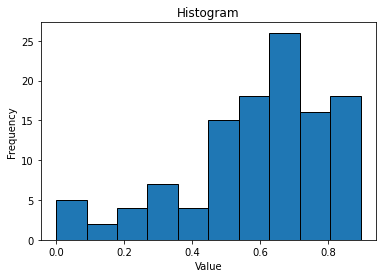

In [59]:
import matplotlib.pyplot as plt

plt.hist(distri['SSK'], bins=10, edgecolor='black')

# 设置标题和轴标签
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

# 显示图形
plt.show()

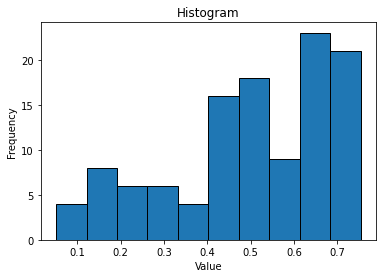

In [60]:
plt.hist(distri['Leven'], bins=10, edgecolor='black')

# 设置标题和轴标签
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

# 显示图形
plt.show()

In [61]:
distri[0:20]

,SSK,Leven
17,0.063861,0.128060
87,0.887560,0.717614
140,0.504121,0.246279
163,0.678277,0.688533
171,0.477170,0.404101
206,0.858586,0.430562
264,0.680449,0.644169
283,0.477148,0.568172
296,0.738408,0.594809
433,0.526405,0.520714


In [33]:
df_semifinal[df_semifinal['state'] == 5]

,Processed Name,processed_parent,borrowerid,borrowername,region,country,IQ_INDUSTRY_SECTOR,parent,parentticker,ticker,...,PAR_MATCH_ID5,SECTOR1,SECTOR2,SECTOR3,SECTOR4,SECTOR5,result_name,result_id,state,matched_no
19,Botswana Development Corp,Botswana Development Corp,156971.0,Botswana Development Corp,Africa,Botswana,Financials,Botswana Development Corp,NaN,NaN,...,NaN,Financials,Financials,NaN,NaN,NaN,Botswana Development Corporation Limited,IQ6771285,5.0,1
84,Burning Glass Technologies,Burning Glass Technologies,161119.0,Burning Glass Technologies,USA/Canada,United States,Information Technology,Burning Glass Technologies,NaN,NaN,...,NaN,Information Technology,NaN,NaN,NaN,NaN,Burning Glass International Inc.,IQ206979023,5.0,1
100,Cairngorm Ltd,Cairngorm Ltd,17616.0,Cairngorm Ltd,Western Europe,United Kingdom,Financials,Cairngorm Ltd,NaN,NaN,...,NaN,Financials,Materials,Industrials,0,Consumer Discretionary,Cairngorm Capital Partners LLP,IQ309680783,5.0,1
101,Caithness Long Island Energy Center,Caithness Long Island Energy Center,120980.0,Caithness Long Island Energy Center,USA/Canada,United States,Utilities,Caithness Long Island Energy Center,NaN,NaN,...,NaN,Utilities,NaN,NaN,NaN,NaN,"Caithness Long Island, LLC",IQ38950905,5.0,1
122,Capita Group Plc,Capita Group Plc,18962.0,Capita Group Plc,Western Europe,United Kingdom,Industrials,Capita Group Plc,CPI,CPI,...,NaN,Industrials,Financials,Financials,Consumer Discretionary,0,Capita plc,IQ879402,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,Gemeinnutziges Siedlungswerk GmbH,Gemeinnutziges Siedlungswerk GmbH,163157.0,Gemeinnutziges Siedlungswerk GmbH,Western Europe,Germany,Real Estate,Gemeinnutziges Siedlungswerk GmbH,NaN,NaN,...,NaN,Real Estate,NaN,NaN,NaN,NaN,Gemeinnutziges Siedlungswerk Speyer Gesellscha...,IQ146247362,5.0,1
4820,Gioi Di Dong JSC,Mobile World Investment Corp,156181.0,Gioi Di Dong JSC,Asia Pacific,Vietnam,Consumer Discretionary,Mobile World Investment Corp,MWG,MWG,...,NaN,Consumer Discretionary,0,NaN,NaN,NaN,Mobile World Investment Corporation,IQ35057477,5.0,1
4913,Grupo Ormazabal SL,Grupo Ormazabal SL,150315.0,Grupo Ormazabal SL,Western Europe,Spain,Industrials,Grupo Ormazabal SL,NaN,NaN,...,NaN,Industrials,Industrials,NaN,NaN,NaN,Grupo Ormazabal Sociedad Limitada,IQ222728045,5.0,1
4953,Hain Celestial Group,Hain Celestial Group,48979.0,Hain Celestial Group,USA/Canada,United States,Consumer Staples,Hain Celestial Group,HAIN,HAIN,...,NaN,Consumer Staples,Financials,Financials,NaN,NaN,"The Hain Celestial Group, Inc.",IQ413188,5.0,1


In [63]:
from cleanco import basename
import re
import abydos.distance as abd
a= basename('ProbiALimited')
b = basename('ProbiAB')
print(abd.DiscountedLevenshtein().sim(a,b))
a,b

0.5749290455565308


('ProbiALimited', 'ProbiAB')

In [ ]:
                ## Here, we use OR instead
                elif (abd.SSK().sim(pro_name,match_name)>0.75 or abd.DiscountedLevenshtein().sim(pro_name,match_name)>0.75):
                    if(abd.SSK().sim(pro_name,match_name)>pre_score):
                            matched = row[('PAR_MATCH_NAME'+i)]
                            matched_id = row[('PAR_MATCH_ID'+i)]
                            check = check + 1
                            pre_score = abd.SSK().sim(pro_name,match_name)
                            matched_no = 'p'+i
                    else:
                        continue
                        
                                if check > 0:
            return pd.Series([matched,matched_id,3,matched_no]) # We allow this to be 3, as for parents, no country double check is needed,
        # and given parents are mostly famous, the capital IQ result is quite solid